In [1]:
import matplotlib.pyplot as plt
import tweepy
import re
import sys,csv
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import string

Enter Keyword/Tag to search about: bitcoin
Enter how many tweets to search: 10
How people are reacting on bitcoin by analyzing 10 tweets.

General Report: 
Weakly Positive

Detailed Report: 
40.00% people thought it was positive
20.00% people thought it was weakly positive
0.00% people thought it was strongly positive
0.00% people thought it was negative
10.00% people thought it was weakly negative
10.00% people thought it was strongly negative
20.00% people thought it was neutral


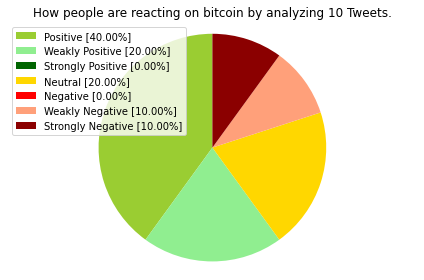

In [2]:
from textblob import TextBlob

class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def DownloadData(self):
        # authenticating
        consumerKey = 'jzn0NU9EviCRRbONbUXX9a8VN'
        consumerSecret = 'ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ'
        accessToken = '781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2'
        accessTokenSecret = 'fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)

        # input for term to be searched and how many tweets to search
        searchTerm = input("Enter Keyword/Tag to search about: ")
        NoOfTerms = int(input("Enter how many tweets to search: "))

        # searching for tweets
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

        # Open/create a file to append data to
        csvFile = open('result.csv', 'a')

        # Use csv writer
        csvWriter = csv.writer(csvFile)


        # creating some variables to store info
        polarity = 0
        positive = 0
        wpositive = 0
        spositive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0


        # iterating through tweets fetched
        for tweet in self.tweets:
            #Append to temp so that we can store in csv later. I use encode UTF-8
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            # print (tweet.text.translate(non_bmp_map))    #print tweet's text
            analysis = TextBlob(tweet.text)
            # print(analysis.sentiment)  # print tweet's polarity
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1


        # Write to csv and close csv file
        csvWriter.writerow(self.tweetText)
        csvFile.close()

        # finding average of how people are reacting
        positive = self.percentage(positive, NoOfTerms)
        wpositive = self.percentage(wpositive, NoOfTerms)
        spositive = self.percentage(spositive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)
        wnegative = self.percentage(wnegative, NoOfTerms)
        snegative = self.percentage(snegative, NoOfTerms)
        neutral = self.percentage(neutral, NoOfTerms)

        # finding average reaction
        polarity = polarity / NoOfTerms

        # printing out data
        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
        print()
        print("General Report: ")

        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0 and polarity <= 0.3):
            print("Weakly Positive")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > 0.6 and polarity <= 1):
            print("Strongly Positive")
        elif (polarity > -0.3 and polarity <= 0):
            print("Weakly Negative")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")
        elif (polarity > -1 and polarity <= -0.6):
            print("Strongly Negative")

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people thought it was positive")
        print(str(wpositive) + "% people thought it was weakly positive")
        print(str(spositive) + "% people thought it was strongly positive")
        print(str(negative) + "% people thought it was negative")
        print(str(wnegative) + "% people thought it was weakly negative")
        print(str(snegative) + "% people thought it was strongly negative")
        print(str(neutral) + "% people thought it was neutral")

        self.plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)


    def cleanTweet(self, tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    # function to calculate percentage
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()



if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.DownloadData()

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#!pip install nltk.sentiment.vader
#from nltk.sentiment.vader import SentimentIntensityAnalyzer

consumerKey = 'jzn0NU9EviCRRbONbUXX9a8VN'
consumerSecret = 'ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ'
accessToken = '781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2'
accessTokenSecret = 'fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: bitcoin
Please enter how many tweets to analyze: 10


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  10
positive number:  6
negative number:  0
neutral number:  4


In [5]:
tweet_list

,0
0,RT @airdropinspect: New airdrop: DinoX (DNXC)\...
1,Viendo aquí que NAYIC ya nos endeudo hasta la ...
2,RT @borisplatero: La resistencia del Bitcoin ₿...
3,@Allowancefi good project. really great. It's ...
4,@SenSanders If you are honestly concerned abou...
5,RT @DocumentingBTC: #Bitcoin uses 67% renewabl...
6,@markets @Bitcoin Hello. I'm a personal crypto...
7,@Epim10 #Bitcoin naturally flows from the weak...
8,"RT @coryklippsten: Every single day, more peop..."
9,@whale_alert Bullish accumulating


In [6]:

tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @airdropinspect: New airdrop: DinoX (DNXC)\...,new airdrop dinox dnxc total reward 5 00...,0.087273,0.460909,positive,0.000,0.582,0.418,0.8687
1,Viendo aquí que NAYIC ya nos endeudo hasta la ...,viendo aqu que nayic ya nos endeudo hasta la ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,RT @borisplatero: La resistencia del Bitcoin ₿...,la resistencia del bitcoin paraliza san sal...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,@Allowancefi good project. really great. It's ...,good project really great it s great that ...,0.700000,0.775000,positive,0.000,0.385,0.615,0.9371
4,@SenSanders If you are honestly concerned abou...,if you are honestly concerned about my rent ...,0.300000,0.450000,positive,0.111,0.756,0.133,0.1280
5,RT @DocumentingBTC: #Bitcoin uses 67% renewabl...,bitcoin uses 67 renewable energy to protect...,0.000000,0.500000,positive,0.000,0.793,0.207,0.5719
6,@markets @Bitcoin Hello. I'm a personal crypto...,hello i m a personal crypto trainer i of...,0.200000,0.550000,positive,0.000,0.611,0.389,0.8807
7,@Epim10 #Bitcoin naturally flows from the weak...,bitcoin naturally flows from the weak to th...,0.052778,0.586111,positive,0.169,0.640,0.192,0.1027
8,"RT @coryklippsten: Every single day, more peop...",every single day more people buy bitcoin th...,0.214286,0.357143,neutral,0.000,1.000,0.000,0.0000
9,@whale_alert Bullish accumulating,alert bullish accumulating,0.000000,0.000000,positive,0.000,0.476,0.524,0.2960


In [7]:
!pip install worldcloud
!pip install stopwords
!pip install image

ERROR: Could not find a version that satisfies the requirement worldcloud (from versions: none)
ERROR: No matching distribution found for worldcloud
You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [8]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [9]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc


def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        df.to_csv("TweetDataset.csv",index=False)
        #df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

In [10]:
# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
Topic= input("Enter keyword/hashtag to search for data: ")
get_tweets(Topic , Count=100)

Enter keyword/hashtag to search for data: bitcoin


In [11]:
df.head(8)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2021-07-21 03:27:55,Sergio Aguirre,False,@2_gekko I think Bitcoin and a handful of coin...,0,0,"San Diego, CA"
1,2021-07-21 03:27:52,CryptoRat,False,I just bought a bitcoin. So what if it goes do...,0,0,
2,2021-07-21 03:27:52,ANTONIO,False,Don't go against the system. Sell ​​#Bitcoin\n...,0,0,
3,2021-07-21 03:27:47,Ayushi,False,@Allowancefi good project. really great. It's ...,0,0,
4,2021-07-21 03:27:46,sillybilly,False,@SenSanders If you are honestly concerned abou...,0,0,
5,2021-07-21 03:27:46,Cheryl Hines,False,@markets @Bitcoin Hello. I'm a personal crypto...,0,0,"Memphis, TN"
6,2021-07-21 03:27:45,Craig Shipp,False,@Epim10 #Bitcoin naturally flows from the weak...,0,0,"Sarasota, Florida, USA"
7,2021-07-21 03:27:44,Matt ₿itcoin 🌐,False,@whale_alert Bullish accumulating,1,0,Earn Interest with ₿itcoin


In [ ]:
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

In [ ]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
!pip install worldcloud
#import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# Start with one review:

text = df.clean_tweet[2]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# # from PIL import Image
# # from wordcloud import WordCloud, STOPWORDS
# #Function to Create Wordcloud

# def create_wordcloud(text):
#     mask = np.array(Image.open("cloud.png"))
#     stopwords = set(STOPWORDS)
#     wc = WordCloud(background_color="white",
#                   mask = mask,
#                   max_words=3000,
#                   stopwords=stopwords,
#                   repeat=True)
#     wc.generate(str(text))
#     wc.to_file("wc.png")
#     print("Word Cloud Saved Successfully")
#     path="wc.png"
#     display(Image.open(path))

In [ ]:
# #Creating wordcloud for all tweets
# create_wordcloud(tw_list["text"].values)